In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
path1 = '/content/drive/MyDrive/DM_LM_Project/train.csv'
path2 = '/content/drive/MyDrive/DM_LM_Project/test.csv'
path3 = '/content/drive/MyDrive/DM_LM_Project/sample_submission.csv'

data_train = pd.read_csv(path1)
data_test = pd.read_csv(path2)
data_sample_submission = pd.read_csv(path3)



معرفة **أبعاد البيانات** في DataFrame
(عدد الصفوف والاعمدة ضمن الداتا)



In [ ]:
data_train.shape

(1458644, 11)

 تجهيز البيانات للنمذجة.


---


القيم المفقودة تسبب مشاكل في الخوارزميات
(تعويض القيم المفقودة )

 DataFrame تنظيف قبل التدريب.

In [ ]:
# تعبئة القيم المفقودة في الأعمدة الفئوية والعددية

data_train['vendor_id'].fillna(data_train['vendor_id'].mode()[0], inplace=True)

data_train['store_and_fwd_flag'].fillna('N', inplace=True)

data_train['passenger_count'].fillna(data_train['passenger_count'].mode()[0], inplace=True)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_7232\193592243.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_train['vendor_id'].fillna(data_train['vendor_id'].mode()[0], inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_7232\193592243.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

التحقق من عدم وجود قيم مفقودة


In [ ]:
data_train.isnull().sum()


id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
data_train.head(10)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
print("أصغر مدة رحلة:", data_train['trip_duration'].min(), "ثانية")
print("أطول مدة رحلة:", data_train['trip_duration'].max(), "ثانية")


أصغر مدة رحلة: 1 ثانية
أطول مدة رحلة: 3526282 ثانية


رسم توزيع مدة الرحلات( Histogram )


---

ك** **bold text**يف تتوزع مدة الرحلات**: هل معظمها قصيرة؟ طويلة؟ هل فيها قيم شاذة (outliers)؟

In [4]:
import plotly.express as px

# Boxplot لمدة الرحلات
fig_duration = px.box(data_sample, x='trip_duration', title='Boxplot of Trip Duration')
fig_duration.show()

# Boxplot للمسافات
fig_distance = px.box(data_sample, x='trip_distance', title='Boxplot of Trip Distance')
fig_distance.show()


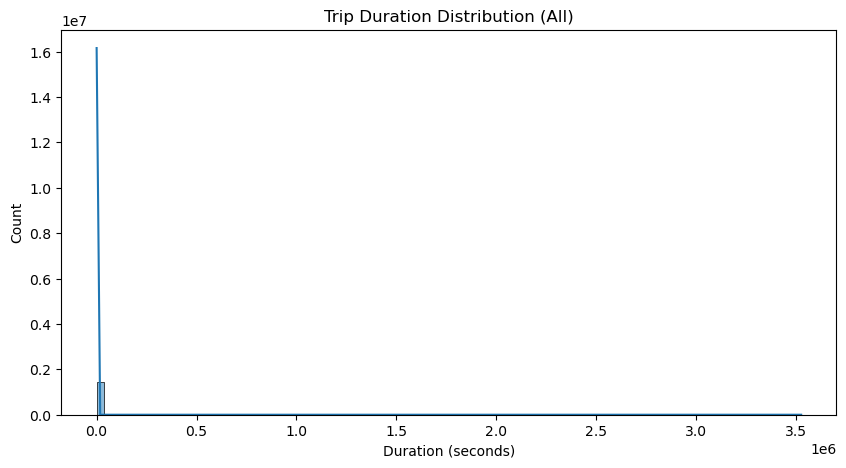

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(data_train['trip_duration'], bins=100, kde=True)
plt.title('Trip Duration Distribution (All)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.show()



التركيز فقط على الرحلات التي مدتها أقل من ساعتين (7200 ثانية).
---


هو تنظيف التحليل البصري، لأن التوزيع الكامل غالبًا يحتوي على قيم شاذة جدًا
(رحلات طويلة جدًا) تشوّه الشكل.

بتحديد المدة إلى أقل من 7200 ثانية:

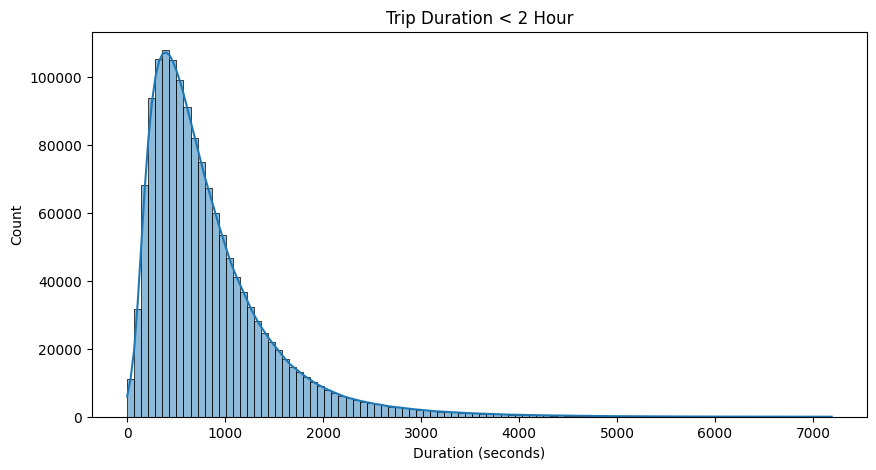

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data_train[data_train['trip_duration'] < 7200]['trip_duration'], bins=100, kde=True)
plt.title('Trip Duration < 2 Hour')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.show()


حساب عدد الركاب ضمن الرحلات


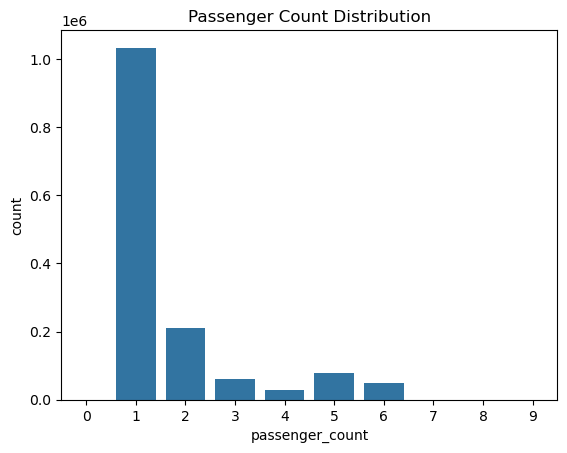

In [ ]:
sns.countplot(x='passenger_count', data=data_train)
plt.title('Passenger Count Distribution')
plt.show()


In [ ]:
print(data_train['passenger_count'].value_counts())


passenger_count
1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: count, dtype: int64


معالجة عمود الانطلاق:تحويه الى datetime

استخراج سمات جديدة:


1.   is_weekend




In [ ]:
# عم نشتغل ع عامود لحظة الانطلاق
data_train['pickup_datetime'] = pd.to_datetime(data_train['pickup_datetime'])

data_train['pickup_hour'] = data_train['pickup_datetime'].dt.hour
data_train['pickup_day'] = data_train['pickup_datetime'].dt.day
data_train['pickup_weekday'] = data_train['pickup_datetime'].dt.dayofweek  # 0 = الاثنين

# Weekend flag
data_train['is_weekend'] = data_train['pickup_weekday'].apply(lambda x: 1 if x >= 5 else 0)


حساب عدد الرحلات بالساعات :

معرفة أوقات الذروة اليومية

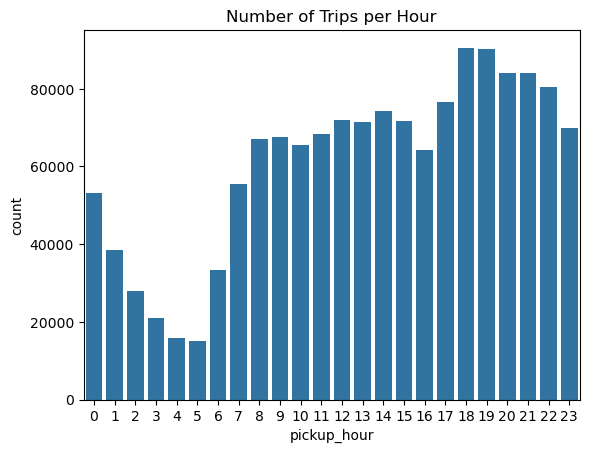

In [ ]:
sns.countplot(x='pickup_hour', data=data_train)
plt.title('Number of Trips per Hour')
plt.show()


عدد الرحلات حسب يوم الأسبوع:

تحليل نمط الأيام: عطل مقابل دوام

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7232\519161770.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pickup_hour', data=data_train, palette='viridis')


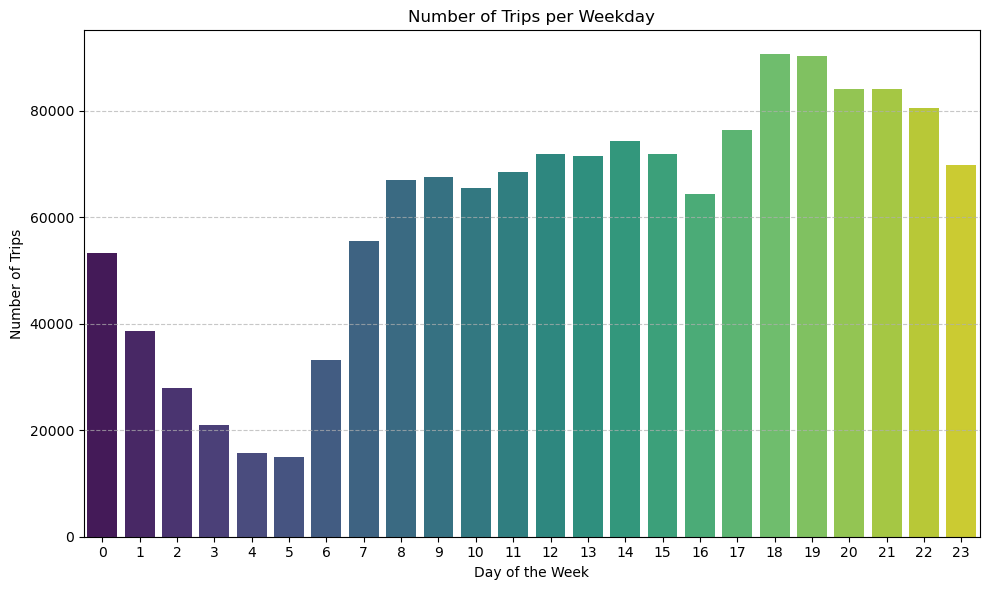

In [ ]:

# خريطة الأعمدة (Bar Plot)
plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_hour', data=data_train, palette='viridis')


plt.title('Number of Trips per Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


عدد الرحلات في كل يوم من الشهر:
متابعة النشاط الشهري

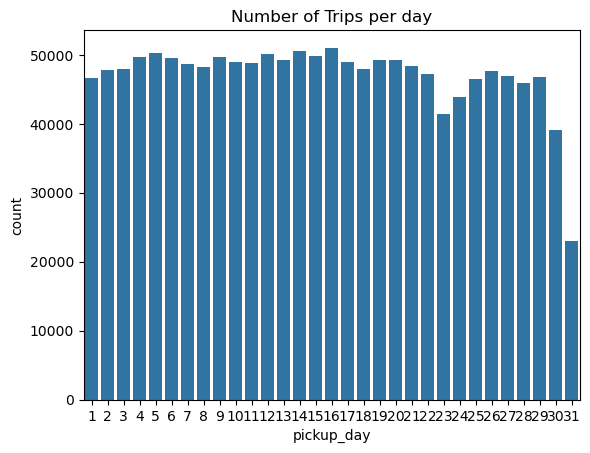

In [ ]:
sns.countplot(x='pickup_day', data=data_train)
plt.title('Number of Trips per day')
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_7232\811086375.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pickup_weekday', data=data_train, palette='viridis')


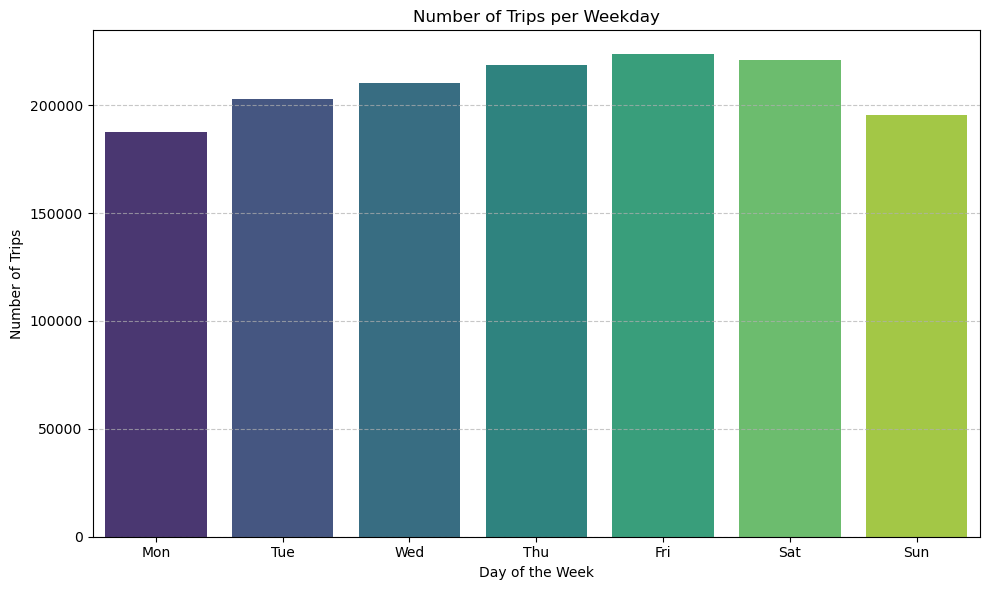

In [ ]:

# خريطة الأعمدة (Bar Plot)
plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_weekday', data=data_train, palette='viridis')

# تسمية الأيام بدل الأرقام
plt.xticks(
    ticks=[0, 1, 2, 3, 4, 5, 6],
    labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
)

plt.title('Number of Trips per Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


يعطي فكرة عن توزيع البيانات حسب الشركات.

هل يوجد انحياز لنموذج شركة معينة؟


In [ ]:
unique_vendors = data_train['vendor_id'].unique()
unique_vendors


array([2, 1], dtype=int64)

In [ ]:

vendor_counts = data_train['vendor_id'].value_counts()


print("أكتر شركة (vendor_id) تكراراً:")
print(vendor_counts)


print("\nأكتر شركة تكراراً هي:")
print(vendor_counts.idxmax(), "بعدد =", vendor_counts.max())


أكتر شركة (vendor_id) تكراراً:
vendor_id
2    780302
1    678342
Name: count, dtype: int64

أكتر شركة تكراراً هي:
2 بعدد = 780302


C:\Users\lenovo\AppData\Local\Temp\ipykernel_7232\197567461.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='vendor_id', data=data_train, palette='Set3')


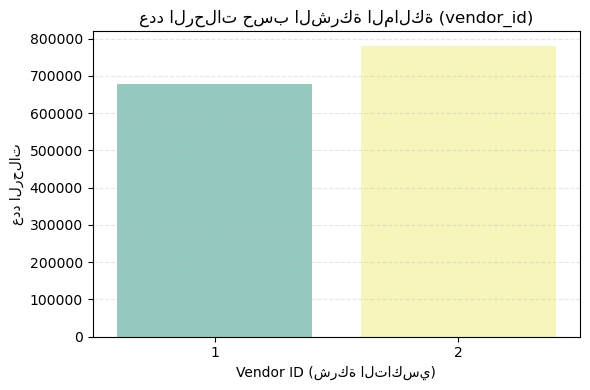

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='vendor_id', data=data_train, palette='Set3')

plt.title('عدد الرحلات حسب الشركة المالكة (vendor_id)')
plt.xlabel('Vendor ID (شركة التاكسي)')
plt.ylabel('عدد الرحلات')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


تعرف مدى المسافات الفعلية للرحلات.

تكشف عن الرحلات الشاذة (مثلاً مسافة 0 أو فوق 100 كم).

يمكن استخدام trip_distance_meters كميزة (feature) مهمة لتوقع مدة الرحلة أو الأجرة.

In [ ]:
def haversine_distance(lat1, lon1, lat2, lon2):
    # تحويل الدرجات إلى راديان
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    r = 6371000  # نصف قطر الأرض بالأمتار
    return c * r

data_train['trip_distance_meters'] = haversine_distance(
    data_train['pickup_latitude'], data_train['pickup_longitude'],
    data_train['dropoff_latitude'], data_train['dropoff_longitude']
)

print(data_train['trip_distance_meters'].head(10))


0    1498.520780
1    1805.507169
2    6385.098495
3    1485.498423
4    1188.588459
5    1098.942459
6    1326.278577
7    5714.980631
8    1310.353283
9    5121.161562
Name: trip_distance_meters, dtype: float64


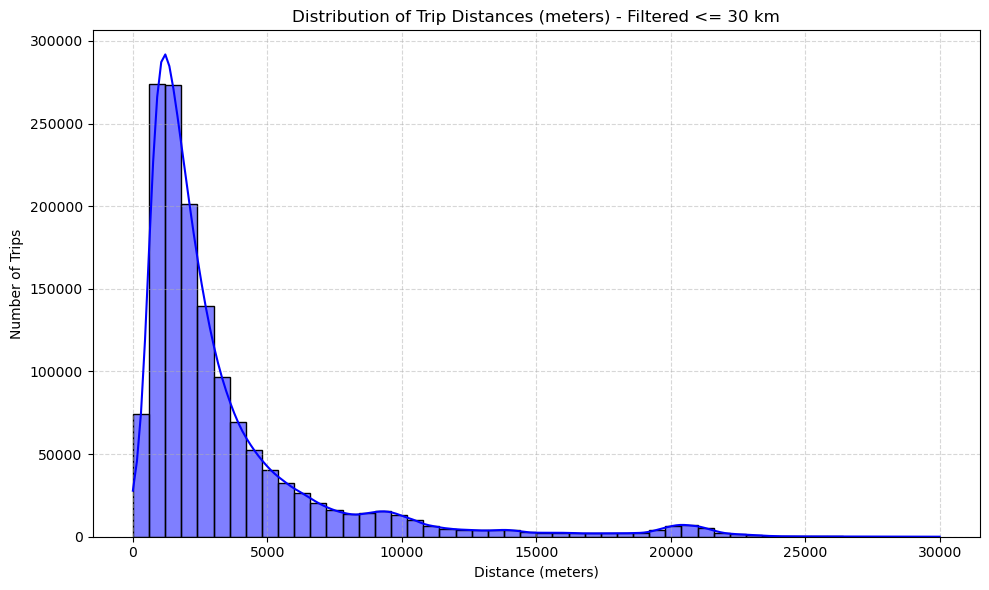

In [ ]:
max_distance = 30000  # 30 كيلومتر

plt.figure(figsize=(10,6))
sns.histplot(data_train[data_train['trip_distance_meters'] <= max_distance]['trip_distance_meters'],
             bins=50, kde=True, color='blue')

plt.title('Distribution of Trip Distances (meters) - Filtered <= 30 km')
plt.xlabel('Distance (meters)')
plt.ylabel('Number of Trips')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


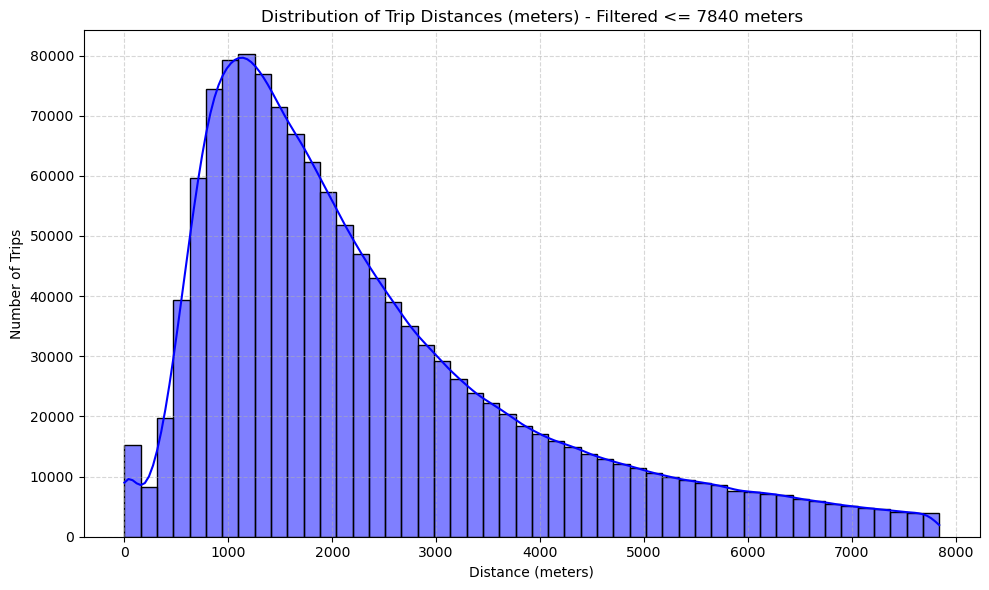

Upper bound (cut-off) for outliers based on IQR: 7840.59 meters


In [ ]:
Q1 = data_train['trip_distance_meters'].quantile(0.25)
Q3 = data_train['trip_distance_meters'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

plt.figure(figsize=(10,6))
sns.histplot(data_train[data_train['trip_distance_meters'] <= upper_bound]['trip_distance_meters'],
             bins=50, kde=True, color='blue')

plt.title(f'Distribution of Trip Distances (meters) - Filtered <= {int(upper_bound)} meters')
plt.xlabel('Distance (meters)')
plt.ylabel('Number of Trips')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print(f"Upper bound (cut-off) for outliers based on IQR: {upper_bound:.2f} meters")


حولنا عمود pickup_datetime لتاريخ ووقت حقيقي

حتى نقدر نستخرج منه معلومات.


استخرجنا خصائص زمنية مثل:

pickup_hour: الساعة (مثلاً 8 صباحًا)

pickup_weekday: اليوم بالأسبوع (مثلاً الجمعة)

pickup_month: الشهر

pickup_is_weekend: هل الرحلة بعطلة نهاية الأسبوع؟

رسمنا مخططات:

توزع الرحلات حسب الساعة

حسب أيام الأسبوع

حسب الأشهر

** الهدف من كل ما سبق**

نفهم متى يكون الطلب على الرحلات أعلى.

نستخدم هذه المعلومات كـ ميزات (features) مفيدة في نماذج التوقع.

نكتشف أنماط الازدحام أو العطل اللي تأثر على الرحلة.

In [ ]:
# معالجة والعمل ع زمن الرحلة
data_train['pickup_datetime'] = pd.to_datetime(data_train['pickup_datetime'])


In [ ]:
data_train['pickup_hour'] = data_train['pickup_datetime'].dt.hour              # الساعة (0 - 23)
data_train['pickup_weekday'] = data_train['pickup_datetime'].dt.dayofweek     # اليوم بالأسبوع (0=الإثنين)
data_train['pickup_month'] = data_train['pickup_datetime'].dt.month           # الشهر (1 - 12)
data_train['pickup_day'] = data_train['pickup_datetime'].dt.day               # اليوم بالشهر
data_train['pickup_is_weekend'] = data_train['pickup_weekday'].isin([5,6])    # جمعة أو سبت؟


In [ ]:
data_train[['pickup_datetime', 'pickup_hour', 'pickup_weekday', 'pickup_month', 'pickup_is_weekend']].head(2)


,pickup_datetime,pickup_hour,pickup_weekday,pickup_month,pickup_is_weekend
0,2016-03-14 17:24:55,17,0,3,False
1,2016-06-12 00:43:35,0,6,6,True


In [ ]:
data_train[['pickup_hour', 'pickup_weekday', 'pickup_month', 'pickup_day']].describe()


,pickup_hour,pickup_weekday,pickup_month,pickup_day
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.360648e+01,3.050375e+00,3.516818e+00,1.550402e+01
std,6.399693e+00,1.954039e+00,1.681038e+00,8.703135e+00
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,9.000000e+00,1.000000e+00,2.000000e+00,8.000000e+00
50%,1.400000e+01,3.000000e+00,4.000000e+00,1.500000e+01
75%,1.900000e+01,5.000000e+00,5.000000e+00,2.300000e+01
max,2.300000e+01,6.000000e+00,6.000000e+00,3.100000e+01


In [ ]:
print(data_train['pickup_hour'].value_counts().sort_index())

print(data_train['pickup_weekday'].value_counts().sort_index())

print(data_train['pickup_month'].value_counts().sort_index())


pickup_hour
0     53248
1     38571
2     27972
3     20895
4     15792
5     15002
6     33248
7     55600
8     67053
9     67663
10    65437
11    68476
12    71873
13    71473
14    74292
15    71811
16    64313
17    76483
18    90600
19    90308
20    84072
21    84185
22    80492
23    69785
Name: count, dtype: int64
pickup_weekday
0    187418
1    202749
2    210136
3    218574
4    223533
5    220868
6    195366
Name: count, dtype: int64
pickup_month
1    229707
2    238300
3    256189
4    251645
5    248487
6    234316
Name: count, dtype: int64


C:\Users\lenovo\AppData\Local\Temp\ipykernel_7232\3172824059.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pickup_hour', data=data_train, palette='Blues')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_7232\3172824059.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pickup_weekday', data=data_train, palette='Greens')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_7232\3172824059.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pickup_month', data=data_train, palette='Oranges')


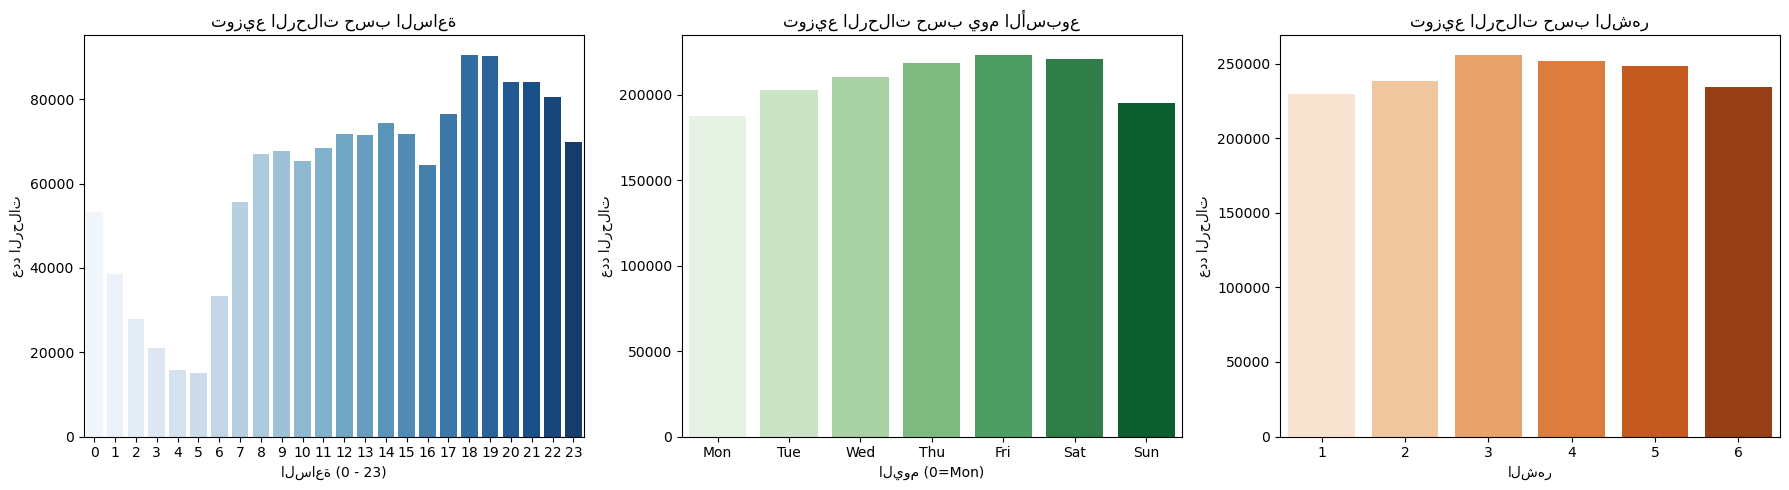

In [ ]:

plt.figure(figsize=(18, 5))

# توزيع الرحلات حسب الساعة
plt.subplot(1, 3, 1)
sns.countplot(x='pickup_hour', data=data_train, palette='Blues')
plt.title('توزيع الرحلات حسب الساعة')
plt.xlabel('الساعة (0 - 23)')
plt.ylabel('عدد الرحلات')

# توزيع الرحلات حسب يوم الأسبوع
plt.subplot(1, 3, 2)
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sns.countplot(x='pickup_weekday', data=data_train, palette='Greens')
plt.title('توزيع الرحلات حسب يوم الأسبوع')
plt.xlabel('اليوم (0=Mon)')
plt.xticks(ticks=range(7), labels=weekday_labels)
plt.ylabel('عدد الرحلات')

# توزيع الرحلات حسب الشهر
plt.subplot(1, 3, 3)
sns.countplot(x='pickup_month', data=data_train, palette='Oranges')
plt.title('توزيع الرحلات حسب الشهر')
plt.xlabel('الشهر')
plt.ylabel('عدد الرحلات')

plt.tight_layout()
plt.show()


استخراج ميزات قوية لمرحلة النمذجة.

1.سمات زمنية

2.عدد الرحلات حسب كل يوم

3.الخصائص الدورية للساعة

4.تصنيف الاوقات

فهم السلوك الزمني للركاب والسائقين.

تحسين أي نموذج تنبؤ (Regression / Classification).

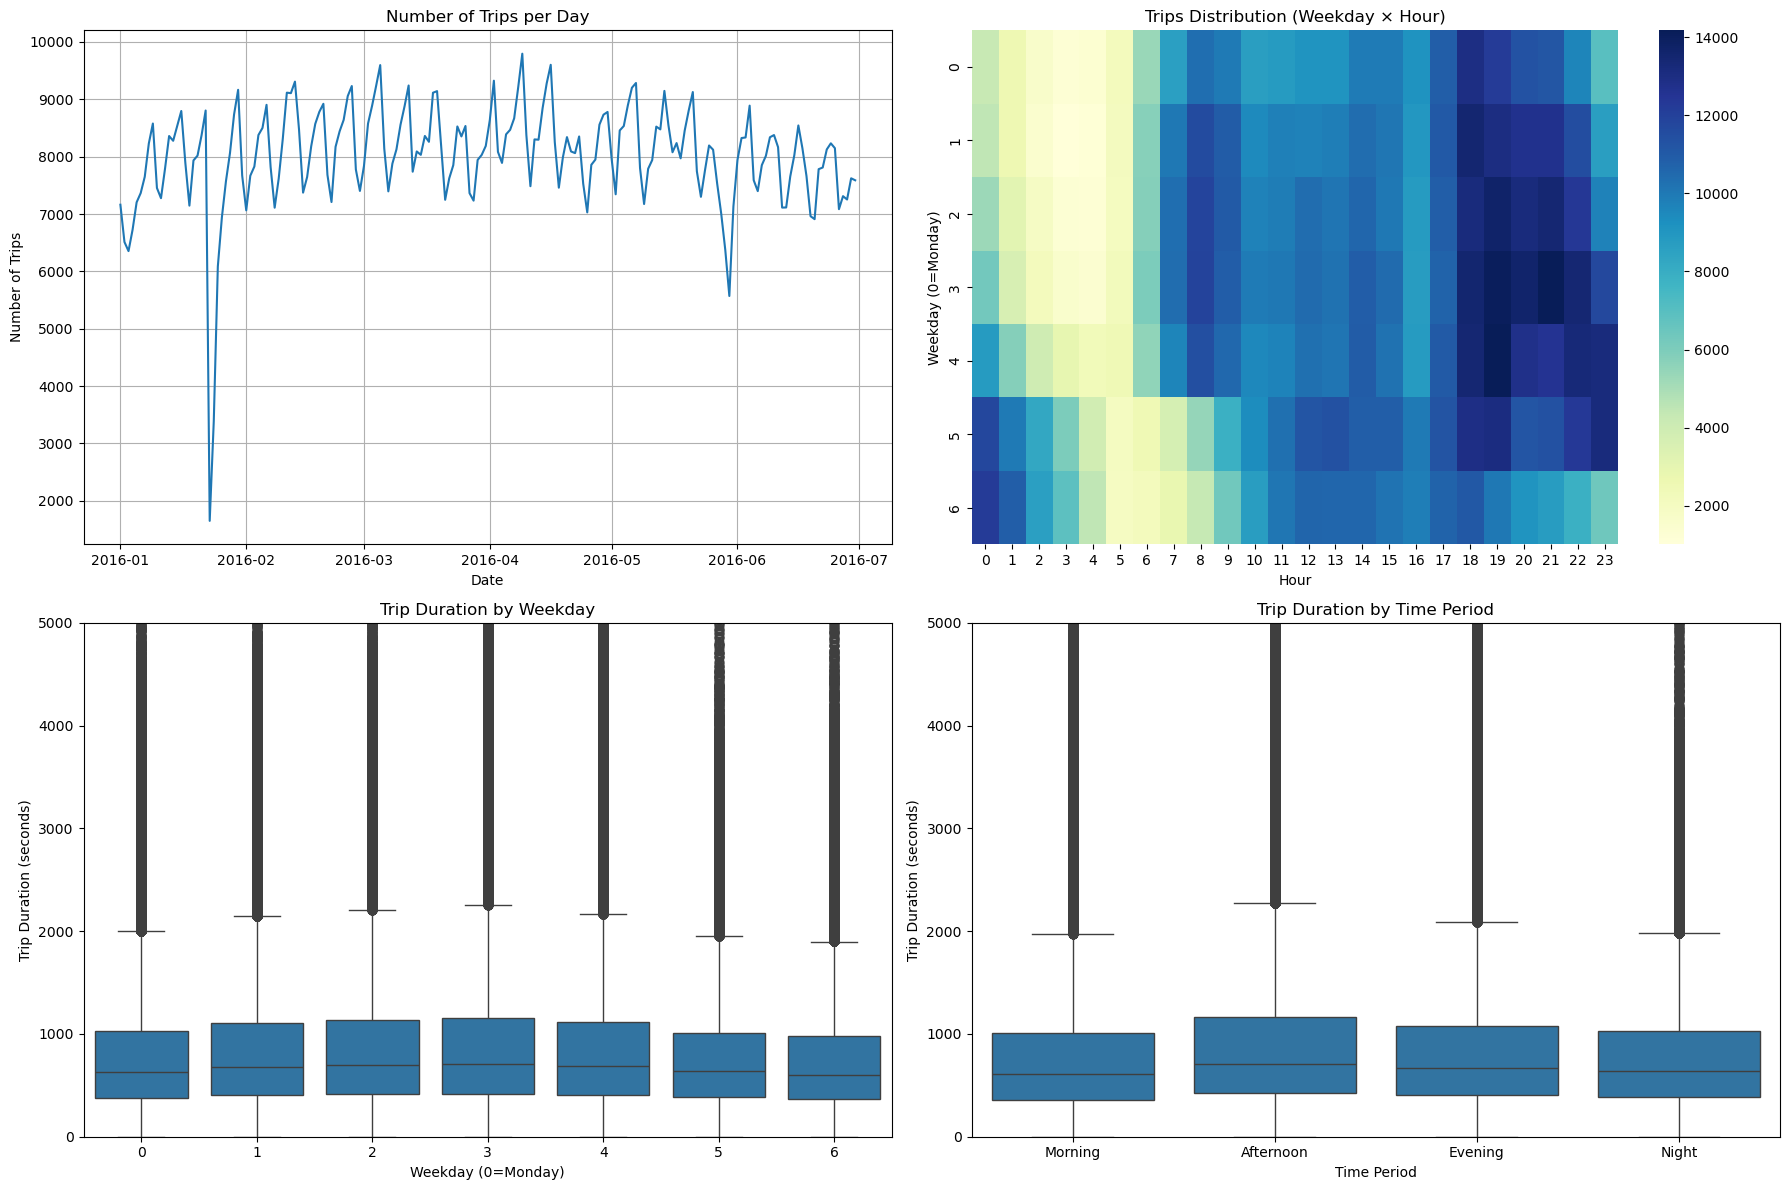

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# استخراج السمات الزمنية
data_train['pickup_weekday'] = data_train['pickup_datetime'].dt.dayofweek
data_train['pickup_date'] = data_train['pickup_datetime'].dt.date

# عدد الرحلات حسب كل يوم
daily_counts = data_train.groupby('pickup_date').size()

# الخصائص الدورية للساعة
data_train['pickup_hour_sin'] = np.sin(2 * np.pi * data_train['pickup_hour'] / 24)
data_train['pickup_hour_cos'] = np.cos(2 * np.pi * data_train['pickup_hour'] / 24)

# تصنيف الوقت إلى فترات
def get_time_period(hour):
    if 5 <= hour < 10:
        return 'Morning'
    elif 10 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

data_train['time_period'] = data_train['pickup_hour'].apply(get_time_period)

# الرسم
plt.figure(figsize=(18, 12))

# 1. Number of trips per day
plt.subplot(2, 2, 1)
daily_counts.plot()
plt.title("Number of Trips per Day")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.grid(True)

# 2. Heatmap: Hour × Weekday
plt.subplot(2, 2, 2)
heatmap_data = data_train.groupby(['pickup_weekday', 'pickup_hour']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title("Trips Distribution (Weekday × Hour)")
plt.xlabel("Hour")
plt.ylabel("Weekday (0=Monday)")

# 3. Trip duration by weekday
plt.subplot(2, 2, 3)
sns.boxplot(x='pickup_weekday', y='trip_duration', data=data_train)
plt.title("Trip Duration by Weekday")
plt.xlabel("Weekday (0=Monday)")
plt.ylabel("Trip Duration (seconds)")
plt.ylim(0, 5000)

# 4. Trip duration by time period
plt.subplot(2, 2, 4)
sns.boxplot(x='time_period', y='trip_duration', data=data_train, order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title("Trip Duration by Time Period")
plt.xlabel("Time Period")
plt.ylabel("Trip Duration (seconds)")
plt.ylim(0, 5000)

plt.tight_layout()
plt.show()


تحليل مدة الرحلة (trip_duration) بعد إزالة القيم الشاذة (Outliers)، مع توضيح الفرق حسب عدد الركاب (passenger_count).

لإزالة تأثير القيم الغريبة التي قد تخرب التحليل أو النماذج.

لملاحظة إن كان عدد الركاب يؤثر على مدة الرحلة.

لتحسين جودة البيانات قبل تدريب أي نموذج.

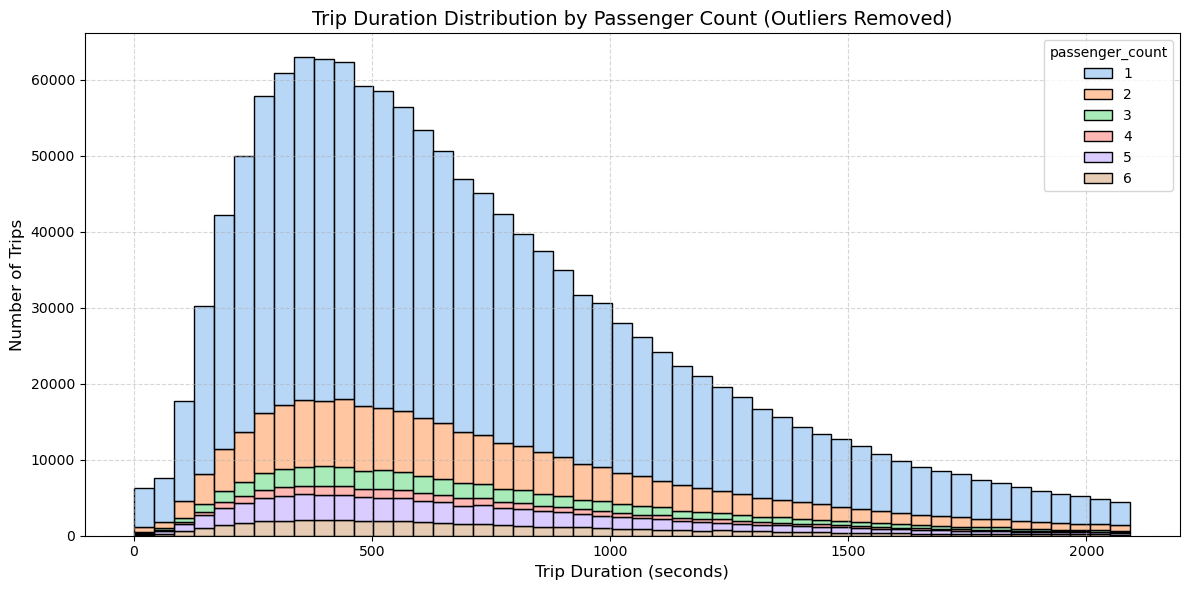

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# حساب حدود القيم الشاذة
Q1 = data_train['trip_duration'].quantile(0.25)
Q3 = data_train['trip_duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# تصفية البيانات بدون القيم الشاذة
filtered_data = data_train[
    (data_train['trip_duration'] >= lower_bound) &
    (data_train['trip_duration'] <= upper_bound)
]

# تحديد عدد ركاب معقولين (من 1 إلى 6)
filtered_data = filtered_data[filtered_data['passenger_count'].isin(range(1, 7))]

# رسم Histogram ملوّن بألوان pastel حسب عدد الركاب
plt.figure(figsize=(12, 6))
sns.histplot(
    data=filtered_data,
    x='trip_duration',
    hue='passenger_count',
    bins=50,
    multiple='stack',
    palette='pastel'  # تغيير الألوان
)

plt.title('Trip Duration Distribution by Passenger Count (Outliers Removed)', fontsize=14)
plt.xlabel('Trip Duration (seconds)', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


رسم خريطة حرارية ثنائية الأبعاد (2D Histogram) توضح العلاقة بين:

CORELATION


مدة الرحلة (trip_duration)

مسافة الرحلة (trip_distance_meters)

مما ساعد على تحديد نمط الرحلات الطبيعية

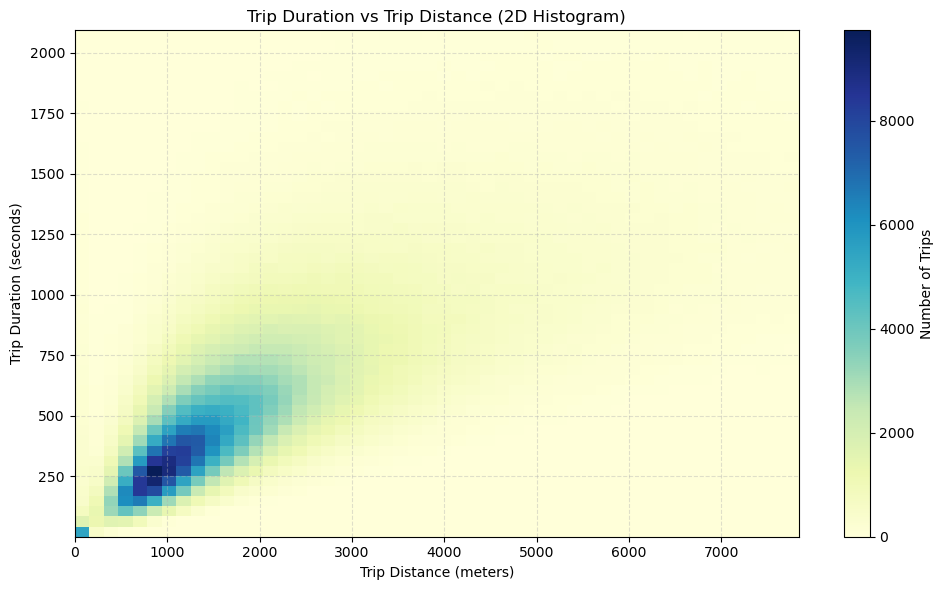

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# إزالة القيم الشاذة من trip_duration و trip_distance_meters
Q1_duration = data_train['trip_duration'].quantile(0.25)
Q3_duration = data_train['trip_duration'].quantile(0.75)
IQR_duration = Q3_duration - Q1_duration
duration_min = Q1_duration - 1.5 * IQR_duration
duration_max = Q3_duration + 1.5 * IQR_duration

Q1_dist = data_train['trip_distance_meters'].quantile(0.25)
Q3_dist = data_train['trip_distance_meters'].quantile(0.75)
IQR_dist = Q3_dist - Q1_dist
dist_min = Q1_dist - 1.5 * IQR_dist
dist_max = Q3_dist + 1.5 * IQR_dist

# تصفية البيانات
filtered_data = data_train[
    (data_train['trip_duration'] >= duration_min) &
    (data_train['trip_duration'] <= duration_max) &
    (data_train['trip_distance_meters'] >= dist_min) &
    (data_train['trip_distance_meters'] <= dist_max)
]

# رسم مخطط 2D histogram
plt.figure(figsize=(10, 6))
plt.hist2d(
    filtered_data['trip_distance_meters'],
    filtered_data['trip_duration'],
    bins=50,
    cmap='YlGnBu'
)

plt.colorbar(label='Number of Trips')
plt.title('Trip Duration vs Trip Distance (2D Histogram)')
plt.xlabel('Trip Distance (meters)')
plt.ylabel('Trip Duration (seconds)')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


يساعد على رؤية العلاقة المباشرة بين المسافة والمدة.

يُظهر إذا كانت هناك نمط خطي (كلما زادت المسافة زادت المدة).

يساهم في فهم البيانات قبل بناء نموذج تنبؤي

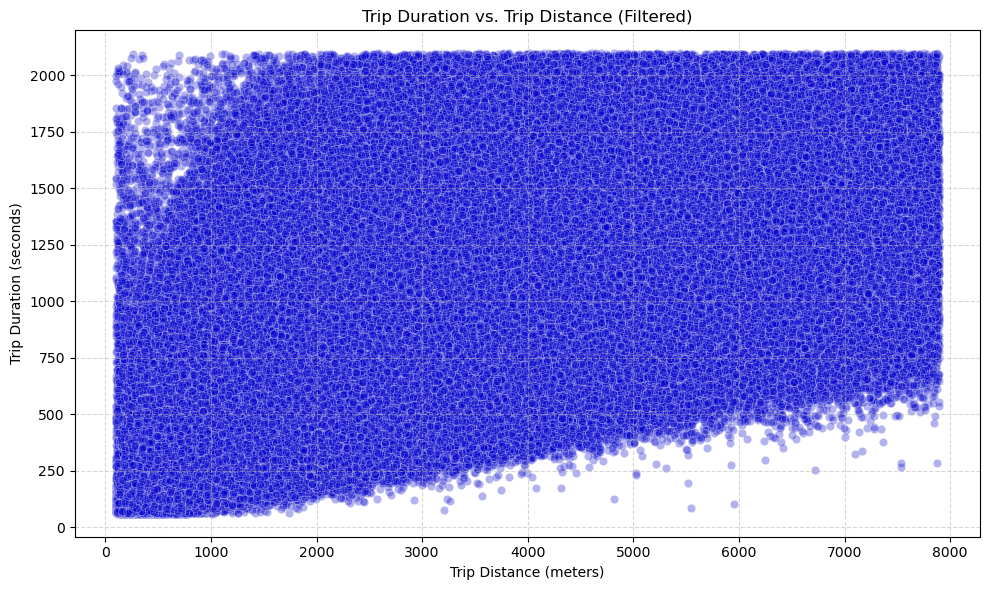

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# حذف القيم غير المنطقية (صفر أو قريبة من الصفر)
filtered_data = data_train[
    (data_train['trip_duration'] > 60) &  # أكتر من 60 ثانية
    (data_train['trip_distance_meters'] > 100)  # أكتر من 100 متر
]

# حساب IQR لـ trip_duration
Q1_duration = filtered_data['trip_duration'].quantile(0.25)
Q3_duration = filtered_data['trip_duration'].quantile(0.75)
IQR_duration = Q3_duration - Q1_duration
duration_min = Q1_duration - 1.5 * IQR_duration
duration_max = Q3_duration + 1.5 * IQR_duration

# حساب IQR لـ trip_distance_meters
Q1_dist = filtered_data['trip_distance_meters'].quantile(0.25)
Q3_dist = filtered_data['trip_distance_meters'].quantile(0.75)
IQR_dist = Q3_dist - Q1_dist
dist_min = Q1_dist - 1.5 * IQR_dist
dist_max = Q3_dist + 1.5 * IQR_dist

# تصفية القيم الشاذة
filtered_data = filtered_data[
    (filtered_data['trip_duration'] >= duration_min) &
    (filtered_data['trip_duration'] <= duration_max) &
    (filtered_data['trip_distance_meters'] >= dist_min) &
    (filtered_data['trip_distance_meters'] <= dist_max)
]

# رسم scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=filtered_data,
    x='trip_distance_meters',
    y='trip_duration',
    alpha=0.3,
    color='mediumblue'
)

plt.title('Trip Duration vs. Trip Distance (Filtered)')
plt.xlabel('Trip Distance (meters)')
plt.ylabel('Trip Duration (seconds)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


" البحث ضمن عمود عدد الركاب لكشف القيم غير المنطقية مثل وجود 0 ركاب أو أكثر من 6، وتم تحديد عدد هذه الحالات لمراجعتها أو معالجتها لاحقًا."



In [ ]:
# تحليل الركاب
print("Unique passenger counts:", data_train['passenger_count'].unique())

invalid_passengers = data_train[(data_train['passenger_count'] == 0) | (data_train['passenger_count'] > 6)]
print(f"عدد الرحلات بقيم شاذة لعدد الركاب: {len(invalid_passengers)}")


Unique passenger counts: [1 6 4 2 3 5 0 7 9 8]
عدد الرحلات بقيم شاذة لعدد الركاب: 65


تحليل العلاقة بين عدد الركاب (passenger_count) و:

مدة الرحلة (trip_duration)

مسافة الرحلة (trip_distance_meters)
لمعرفة هل هناك تأثير واضح لعدد الركاب على الزمن أو المسافة.

<Figure size 1400x600 with 0 Axes>

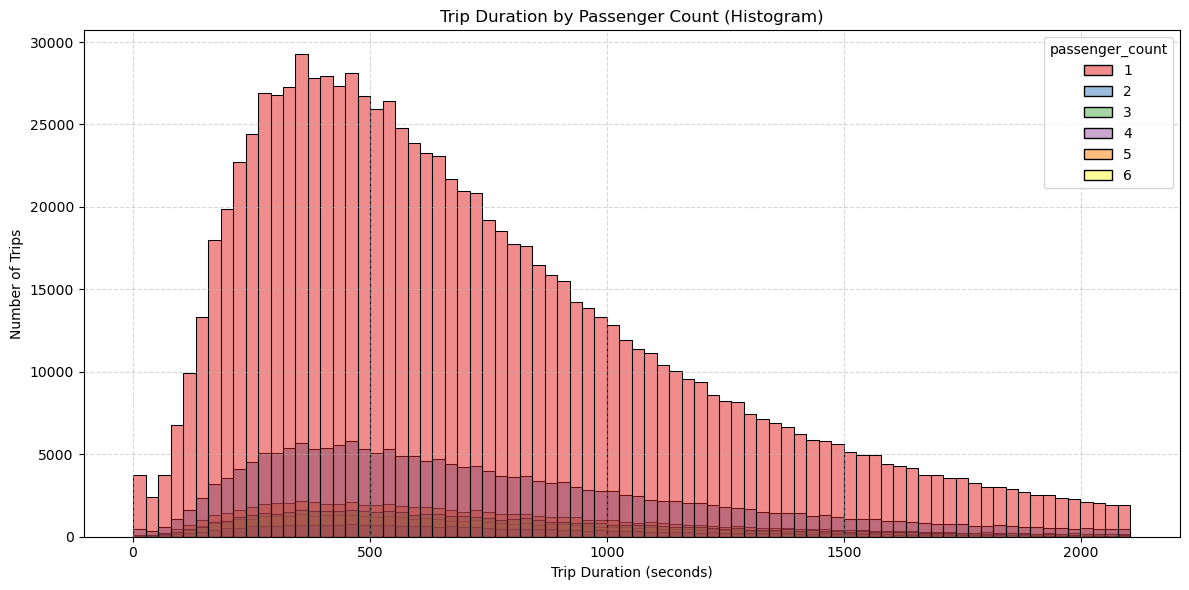

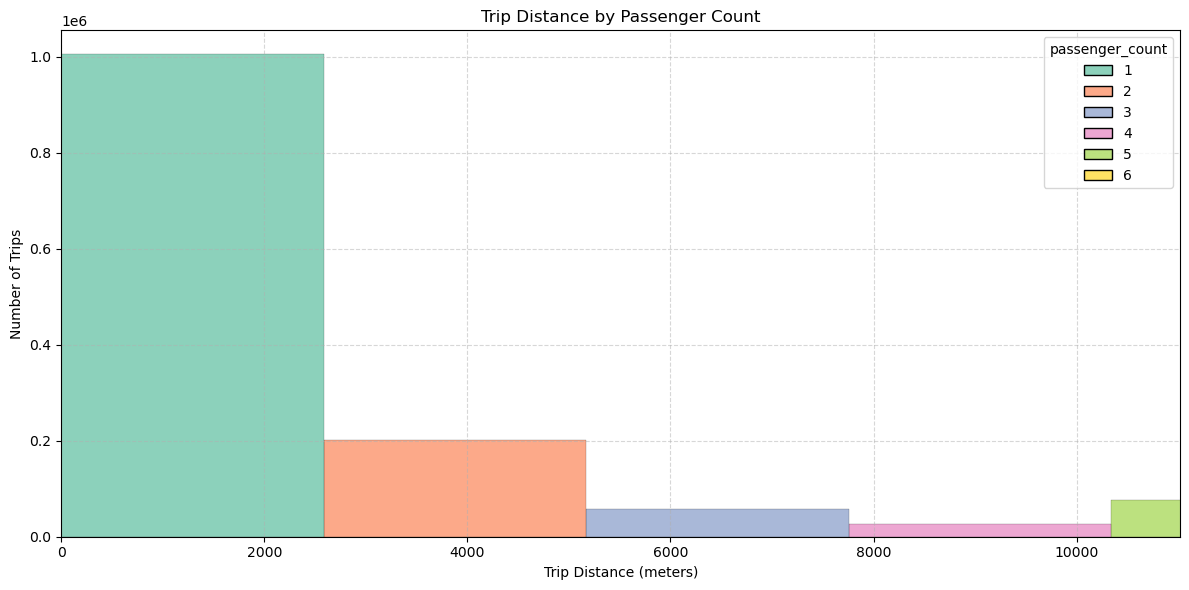

In [ ]:

plt.figure(figsize=(14, 6))

# مدة الرحلة حسب عدد الركاب
import matplotlib.pyplot as plt
import seaborn as sns

# تحديد البيانات بين 1 و 6 ركّاب وإزالة القيم الشاذة للمدة
filtered_data = data_train[
    (data_train['passenger_count'].between(1, 6)) &
    (data_train['trip_duration'] <= data_train['trip_duration'].quantile(0.95))
]

plt.figure(figsize=(12, 6))
sns.histplot(
    data=filtered_data,
    x='trip_duration',
    hue='passenger_count',
    bins=80,
    kde=False,
    palette='Set1',
    multiple='layer'  # كل فئة فوق التانية بشفافية
)

plt.title("Trip Duration by Passenger Count (Histogram)")
plt.xlabel("Trip Duration (seconds)")
plt.ylabel("Number of Trips")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




# مسافة الرحلة حسب عدد الركاب


plt.figure(figsize=(12, 6))
sns.histplot(
    data=data_train[data_train['passenger_count'].between(1, 6)],
    x='trip_distance_meters',
    hue='passenger_count',
    bins=80,
    kde=False,
    palette='Set2',
    multiple='dodge'  # فصل الهستوغرام لكل فئة
)
plt.title("Trip Distance by Passenger Count")
plt.xlabel("Trip Distance (meters)")
plt.ylabel("Number of Trips")
plt.xlim(0, data_train['trip_distance_meters'].quantile(0.95))  # إزالة التطرفات
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




 رسم خريطة نقاط الانطلاق باستخدام folium



In [ ]:
import folium
from folium.plugins import HeatMap

# مركز الخريطة
map_center = [40.730610, -73.935242]  # نيويورك
m = folium.Map(location=map_center, zoom_start=12)

# إعداد بيانات الإحداثيات
heat_data = data_sample[['pickup_latitude', 'pickup_longitude']].dropna().values.tolist()

# إضافة طبقة heatmap
HeatMap(heat_data, radius=8, blur=5).add_to(m)

m  # لعرض الخريطة في Jupyter


 تحديد أكثر المناطق نشاطًا جغرافيًا باستخدام التجميع (grid)



In [ ]:
# تقريب الإحداثيات لدرجتين عشريتين (لتجميعها في مربعات صغيرة)
data_sample['pickup_area'] = data_sample['pickup_latitude'].round(2).astype(str) + "_" + data_sample['pickup_longitude'].round(2).astype(str)

# حساب عدد الرحلات بكل منطقة
area_counts = data_sample['pickup_area'].value_counts().reset_index()
area_counts.columns = ['area', 'count']

# عرض أكثر 10 مناطق ازدحامًا
print("أكثر 10 مناطق ازدحاماً:")
print(area_counts.head(10))


In [ ]:
# نحدد المتغير الهدف
target = 'trip_duration'

# نختار بعض السمات المحتملة
features = [
    'passenger_count',
    'trip_distance_meters',
    'pickup_hour',
    'pickup_weekday',
    'pickup_latitude',
    'pickup_longitude',
    'dropoff_latitude',
    'dropoff_longitude'
]

X = data_train[features]
y = data_train[target]


**Machine Learning**


Using Random Forest Regressor
1. تحديد الهدف والمتغيرات المهمة
2. فصل الميزات والهدف
3. تقسيم البيانات للتدريب والاختبار
4. تدريب نموذج Random Forest
5. استخراج أهمية الميزات
 6. رسم أهمية الميزات

/tmp/ipython-input-14-1155680132.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


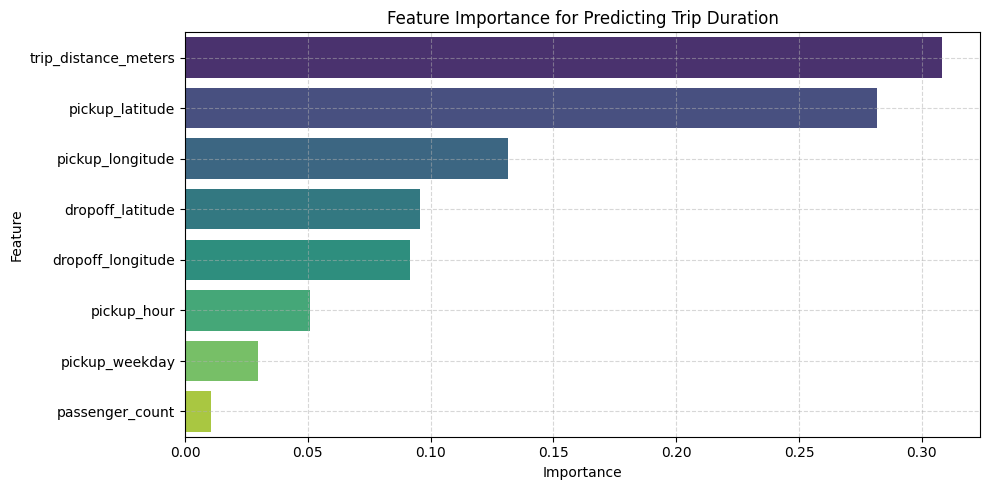

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# نموذج Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# استخراج الأهمية
importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# رسم
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance for Predicting Trip Duration")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Linear Regression with **StandardScaler**
الانحدار الخطي يتأثر بشكل كبير بالوحدات والقيم الكبيرة.

فمثلاً: المسافة بالأمتار أكبر بكثير من عدد الركاب → هذا يخلي coefficients منحازة.

لذلك قمنا بتوحيد القيم لتكون بمتوسط = 0 وانحراف معياري = 1 (Normalization).


/tmp/ipython-input-15-200898004.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df_lr, palette='magma')


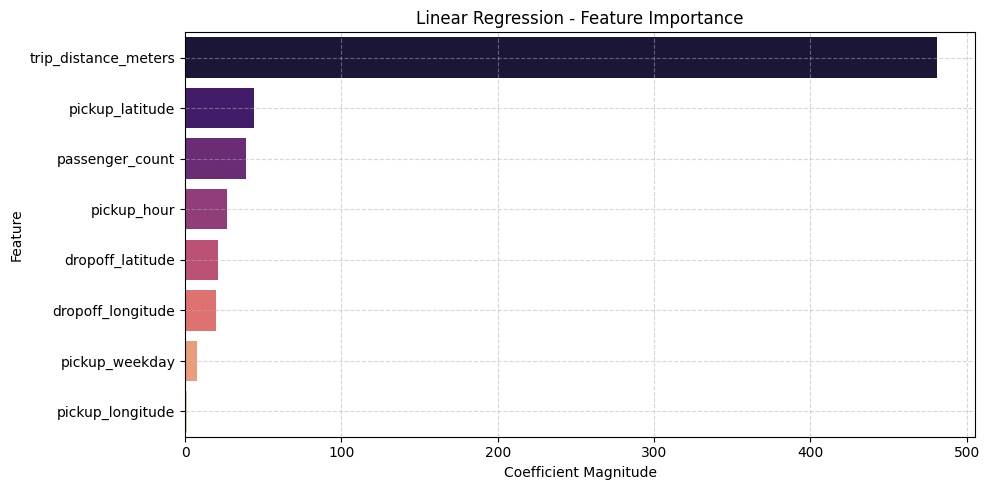

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# توحيد الميزات
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# تدريب نموذج الانحدار الخطي
lr_model = LinearRegression()
lr_model.fit(X_scaled, y)

# استخراج المعاملات كأهمية
importance_df_lr = pd.DataFrame({
    'Feature': features,
    'Importance': np.abs(lr_model.coef_)  # نأخذ القيمة المطلقة لأن بعض القيم قد تكون سالبة
}).sort_values(by='Importance', ascending=False)

# رسم الأهمية
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df_lr, palette='magma')
plt.title("Linear Regression - Feature Importance")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**F-TEST**

*why?*

هذا اختبار إحصائي بسيط يعطي فكرة سريعة عن ارتباط كل ميزة بشكل خطي مع الهدف.

مهم في مرحلة اختيار الميزات (feature selection) لتحديد المتغيرات التي تستحق الاستمرار في النمذجة.

يختلف عن أهمية الميزات من النماذج (مثل Random Forest أو Linear Regression) لأنه يعتمد فقط على اختبار إحصائي.


/tmp/ipython-input-16-2822147308.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F_value', y='Feature', data=importance_df_f, palette='coolwarm')


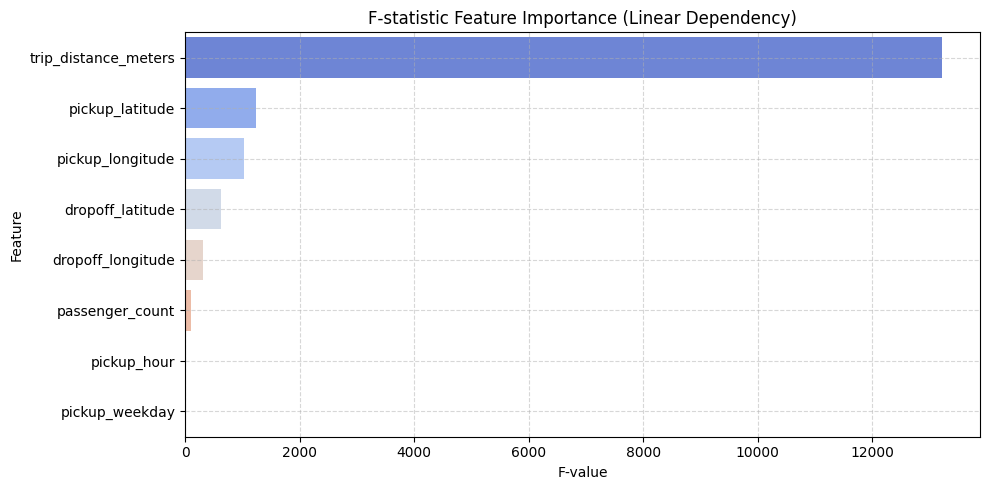

In [ ]:
from sklearn.feature_selection import f_regression

f_values, p_values = f_regression(X, y)

importance_df_f = pd.DataFrame({
    'Feature': features,
    'F_value': f_values
}).sort_values(by='F_value', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='F_value', y='Feature', data=importance_df_f, palette='coolwarm')
plt.title("F-statistic Feature Importance (Linear Dependency)")
plt.xlabel("F-value")
plt.ylabel("Feature")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
def clean_data(df, feature_cols, target_col):
    df = df.dropna(subset=feature_cols + [target_col])

    def remove_outliers_iqr(df, col):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        return df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

    for col in ['trip_distance_meters', 'trip_duration']:
        df = remove_outliers_iqr(df, col)

    return df

# الأعمدة
feature_cols = [
    'trip_distance_meters',
    'passenger_count',
    'pickup_latitude', 'pickup_longitude',
    'dropoff_latitude', 'dropoff_longitude'
]
target_col = 'trip_duration'

data_clean = clean_data(data_train, feature_cols, target_col)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_7232\765287570.py:41: UserWarning: Glyph 128683 (\N{NO ENTRY SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128683 (\N{NO ENTRY SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


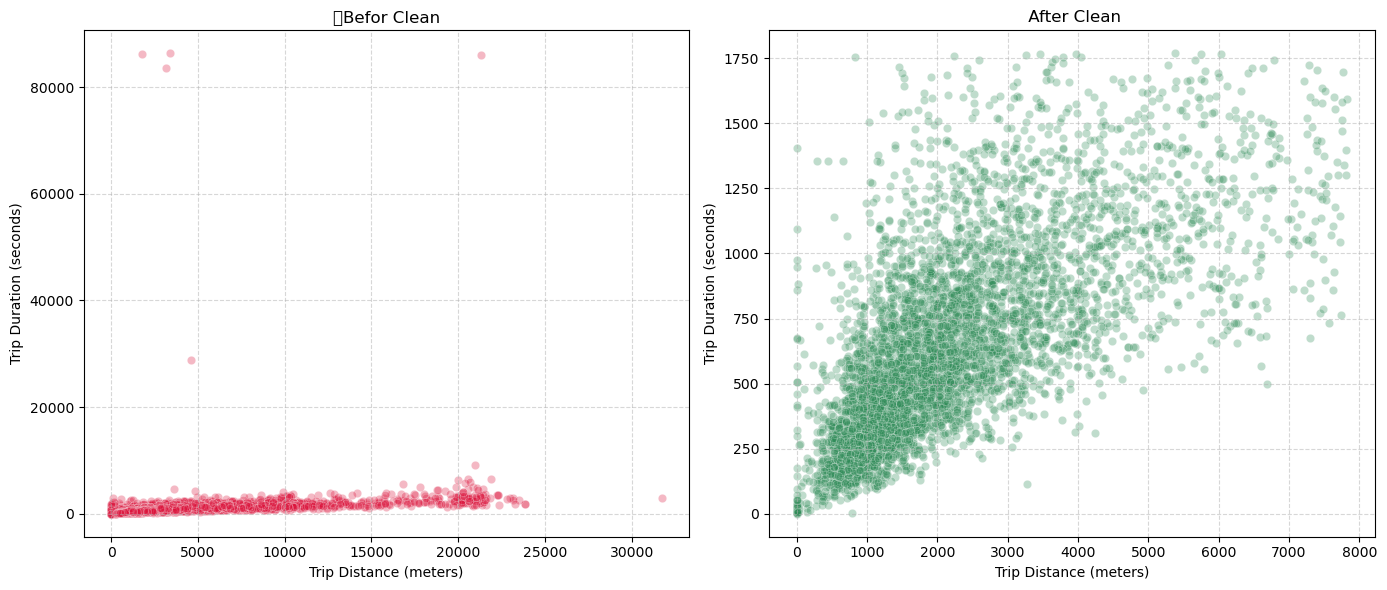

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# بيانات قبل التنظيف (نأخذ عينة عشوائية لسهولة الرسم)
sample_before = data_train.sample(5000, random_state=42)

# بيانات بعد التنظيف (نأخذ نفس العدد للمقارنة العادلة)
sample_after = data_clean.sample(5000, random_state=42)

# الشكل
plt.figure(figsize=(14, 6))

# قبل التنظيف
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=sample_before,
    x='trip_distance_meters',
    y='trip_duration',
    alpha=0.3,
    color='crimson'
)
plt.title("🚫Befor Clean")
plt.xlabel("Trip Distance (meters)")
plt.ylabel("Trip Duration (seconds)")
plt.grid(True, linestyle='--', alpha=0.5)

# بعد التنظيف
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=sample_after,
    x='trip_distance_meters',
    y='trip_duration',
    alpha=0.3,
    color='seagreen'
)
plt.title(" After Clean")
plt.xlabel("Trip Distance (meters)")
plt.ylabel("Trip Duration (seconds)")
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# --- 1. تحديد الأعمدة ---
feature_cols = [
    'trip_distance_meters',
    'passenger_count',
    'pickup_latitude', 'pickup_longitude',
    'dropoff_latitude', 'dropoff_longitude'
]
target_col = 'trip_duration'

X = data_clean[feature_cols]
y = data_clean[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = ColumnTransformer([
    ('scale_features', StandardScaler(), feature_cols)
])

pipeline = Pipeline([
    ('scaling', scaler),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

pipeline.fit(X_train, y_train)
score = pipeline.score(X_test, y_test)
print(f"Model R^2 Score: {score:.4f}")


Model R^2 Score: 0.6081


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

feature_cols = [
    'trip_distance_meters',
    'passenger_count',
    'pickup_latitude', 'pickup_longitude',
    'dropoff_latitude', 'dropoff_longitude'
]
target_col = 'trip_duration'

X = data_clean[feature_cols]
y = data_clean[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GradientBoostingRegressor(n_estimators=300, learning_rate=0.03, random_state=42))
])

pipeline.fit(X_train, y_train)
score = pipeline.score(X_test, y_test)
print(f"Improved GB R^2 Score: {score:.4f}")


Improved GB R^2 Score: 0.5512


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# اختيار الأعمدة المستخدمة
feature_cols = [
    'trip_distance_meters',
    'passenger_count',
    'pickup_latitude', 'pickup_longitude',
    'dropoff_latitude', 'dropoff_longitude'
]
target_col = 'trip_duration'

# تقسيم الميزات والهدف
X = data_clean[feature_cols]
y = data_clean[target_col]

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# إنشاء بايبلاين مع Decision Tree
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(max_depth=10, random_state=42))  # ممكن تعدل العمق حسب الحاجة
])

# تدريب النموذج
pipeline.fit(X_train, y_train)

# تقييم الأداء
score = pipeline.score(X_test, y_test)
print(f"Decision Tree R^2 Score: {score:.4f}")


Decision Tree R^2 Score: 0.5592


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# الأعمدة المستخدمة
feature_cols = [
    'trip_distance_meters',
    'passenger_count',
    'pickup_latitude', 'pickup_longitude',
    'dropoff_latitude', 'dropoff_longitude'
]
target_col = 'trip_duration'

# تقسيم البيانات
X = data_clean[feature_cols]
y = data_clean[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# بايبلاين مع SVR
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVR(kernel='rbf', C=1.0, epsilon=0.2))  # فيك تعدل المعاملات حسب التجربة
])

# تدريب النموذج
pipeline.fit(X_train, y_train)

# تقييم النموذج
score = pipeline.score(X_test, y_test)
print(f"SVR R^2 Score: {score:.4f}")


In [ ]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# الأعمدة المستخدمة
feature_cols = [
    'trip_distance_meters',
    'passenger_count',
    'pickup_latitude', 'pickup_longitude',
    'dropoff_latitude', 'dropoff_longitude'
]
target_col = 'trip_duration'

# تقسيم البيانات
X = data_clean[feature_cols]
y = data_clean[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# بايبلاين مع LinearSVR
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearSVR(epsilon=1.0, C=1.0, random_state=42, max_iter=10000))
])

# تدريب النموذج
pipeline.fit(X_train, y_train)

# تقييم النموذج
score = pipeline.score(X_test, y_test)
print(f"Linear SVR R^2 Score: {score:.4f}")
